<div style="display:float">
  <h1 style="margin-top: 36px; font-size: 32px; float:left">Kmeans Classification</h1>
    <img style="vertical-align:middle; float:right" src="http://gntlearning.com/wp-content/uploads/2021/05/Small_Logo-278x64.jpg" width=250px>
</div>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## Run Standard Kmeans Clustering

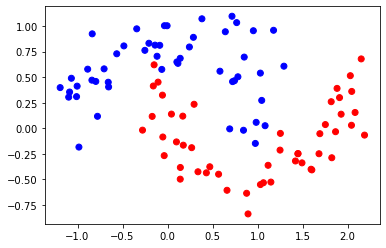

In [4]:
x_train, y_train = make_moons(noise=0.2)
x_valid, y_valid = make_moons(noise=0.2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')

In [6]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)
print(kmeans.cluster_centers_)
print(kmeans.predict(x_train))

[[ 1.75699007 -0.00254548]
 [-0.88553582  0.42483667]
 [-0.05219643  0.57019768]
 [ 0.63477009 -0.33969641]
 [ 0.83493661  0.72571386]]
[3 1 2 0 0 3 4 2 3 4 2 3 1 2 2 3 0 2 0 3 1 4 0 1 1 3 1 2 4 2 2 0 3 3 0 4 2
 3 0 1 3 0 4 3 1 2 2 2 0 4 1 0 2 2 1 4 0 2 2 4 3 4 0 3 1 1 3 1 4 3 3 1 0 0
 2 1 2 3 0 0 0 0 0 2 0 2 4 4 1 2 0 3 2 3 4 2 2 3 3 0]


## Visualize Clusters

In [10]:
x0_values = np.linspace(-1.5, 2.5, 100)
x1_values = np.linspace(-1, 1.5, 100)
coords = np.asarray(np.meshgrid(x0_values, x1_values)).T.reshape(-1,2)

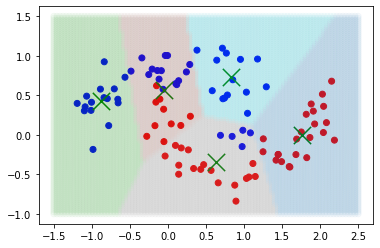

In [11]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='g', marker='x', s=300)
plt.scatter(coords[:,0], coords[:,1], c=kmeans.predict(coords), cmap='tab10', alpha=0.04)

## Get Labels for Clusters

In [14]:
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label
cluster_y

{0: 1, 1: 0, 2: 0, 3: 1, 4: 0}

In [17]:
preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
train_acc = accuracy_score(y_train, preds_train)

preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
valid_acc = accuracy_score(y_valid, preds_valid)

print(train_acc, valid_acc)

0.85 0.89


## Find Best k Value

In [18]:
for k in range(2, 20):
    # Do clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    
    # Map which label each cluster is 
    cluster_y = {}
    for i in range(k):
        counts = Counter(y_train[kmeans.labels_==i])
        label = counts.most_common()[0][0]
        cluster_y[i] = label
    
    # Evaluate results
    preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
    train_acc = accuracy_score(y_train, preds_train)

    preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
    valid_acc = accuracy_score(y_valid, preds_valid)

    print(k, train_acc, valid_acc)

2 0.69 0.74
3 0.76 0.77
4 0.84 0.87
5 0.85 0.89
6 0.91 0.93
7 0.92 0.95
8 0.95 0.94
9 0.98 0.96
10 0.97 0.95
11 0.98 0.95
12 0.96 0.95
13 0.98 0.95
14 0.98 0.95
15 0.97 0.96
16 0.96 0.93
17 0.98 0.96
18 0.97 0.96
19 0.97 0.95


## Results for best k

In [19]:
# Do clustering
k = 9
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)

# Map which label each cluster is 
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label

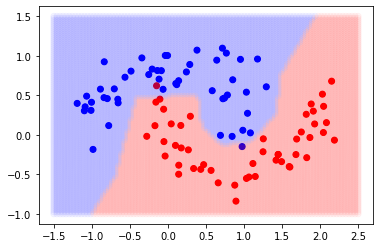

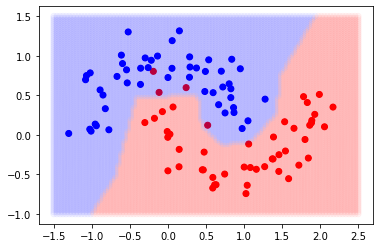

In [25]:
preds_coords = [cluster_y[el] for el in kmeans.predict(coords)]
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.04)
plt.show()

plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.04)
plt.show()

0.95


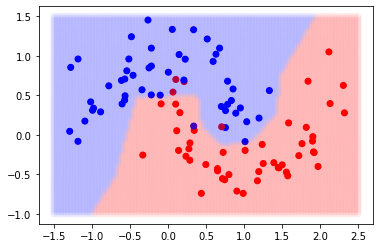

In [26]:
x_test, y_test = make_moons(noise=0.2)
preds_test = [cluster_y[el] for el in kmeans.predict(x_test)]
test_acc = accuracy_score(y_test, preds_test)
print(test_acc)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.04)